# Instituto Federal Fluminense Campus Bom Jesus do Itabapoana
# Bacharelado em Engenharia de Computação
 
# Aluno: Pedro Henrique Rocha de Andrade
# Professor: Rodrigo Lacerda da Silva

# Atividades Práticas

# 23 de Setembro de 2025
# Bom Jesus do Itabapoana

## Questão 1: Decomposição LU
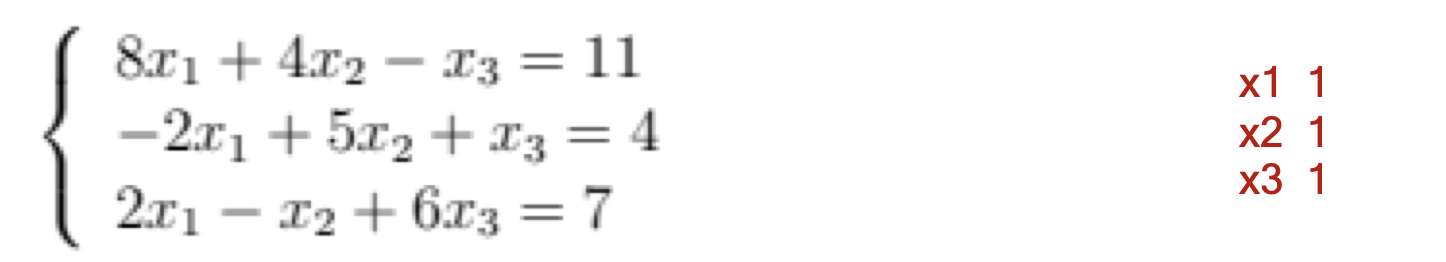

In [33]:
import numpy as np
from sympy import symbols

def montar_sistema_valores():
    n = int(input("Digite o número de variáveis (sistema quadrado): "))
    print("Insira os coeficientes de cada equação separados por espaço (exemplo: 1 -3 2):")
    A = []
    for i in range(n):
        linha = list(map(float, input(f"Coeficientes da equação {i+1}: ").split()))
        if len(linha) != n:
            raise ValueError("Número de coeficientes deve ser igual ao número de variáveis.")
        A.append(linha)
    print("Insira os termos independentes do vetor b, um valor por linha:")
    b = [float(input(f"b{i+1}: ")) for i in range(n)]
    variaveis = symbols(f'x1:{n+1}')
    A = np.array(A)
    b = np.array(b)
    return A, b, variaveis

def lu_sem_pivot(A):
    n = len(A)
    U = A.astype(float).copy()
    L = np.eye(n)
    print('\nInício da decomposição LU sem pivotação:')
    for k in range(n-1):
        print(f'Etapa {k}:')
        for i in range(k+1, n):
            m = U[i,k]/U[k,k]
            print(f"m_{{{i+1},{k+1}}} = {U[i,k]} / {U[k,k]} = {m}")
            L[i,k] = m
            U[i,:] -= m * U[k,:]
            print(f"Linha {i+1}: ({m})*L_{k+1} + L_{i+1}")
            print('U =\n', U)
            print('L =\n', L)
    return L, U

def forward_solve(L, b):
    n = len(L)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i]))/L[i,i]
    return y

def triangular_solve(U, y):
    n = len(U)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:]))/U[i,i]
    return x

def residuos(A, x, b):
    r = b - A @ x
    return r  # Sem arredondamentos ou alterações

def main():
    A, b, vars = montar_sistema_valores()
    print('\n==== LU sem pivotação ===')
    L, U = lu_sem_pivot(A)
    y = forward_solve(L, b)
    x = triangular_solve(U, y)
    print('\nSolução (sem pivotação):')
    for v, val in zip(vars, x):
        print(f"{v} = {val}")
    res = residuos(A, x, b)
    print('Resíduo:', res)

if __name__ == "__main__":
    main()

Insira os coeficientes de cada equação separados por espaço (exemplo: 1 -3 2):
Insira os termos independentes do vetor b, um valor por linha:

==== LU sem pivotação ===

Início da decomposição LU sem pivotação:
Etapa 0:
m_{2,1} = -2.0 / 8.0 = -0.25
Linha 2: (-0.25)*L_1 + L_2
U =
 [[ 8.    4.   -1.  ]
 [ 0.    6.    0.75]
 [ 2.   -1.    6.  ]]
L =
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.    0.    1.  ]]
m_{3,1} = 2.0 / 8.0 = 0.25
Linha 3: (0.25)*L_1 + L_3
U =
 [[ 8.    4.   -1.  ]
 [ 0.    6.    0.75]
 [ 0.   -2.    6.25]]
L =
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.25  0.    1.  ]]
Etapa 1:
m_{3,2} = -2.0 / 6.0 = -0.3333333333333333
Linha 3: (-0.3333333333333333)*L_2 + L_3
U =
 [[ 8.    4.   -1.  ]
 [ 0.    6.    0.75]
 [ 0.    0.    6.5 ]]
L =
 [[ 1.          0.          0.        ]
 [-0.25        1.          0.        ]
 [ 0.25       -0.33333333  1.        ]]

Solução (sem pivotação):
x1 = 1.0
x2 = 1.0
x3 = 1.0
Resíduo: [0. 0. 0.]


## Questão 2a: Eliminação de Gauss
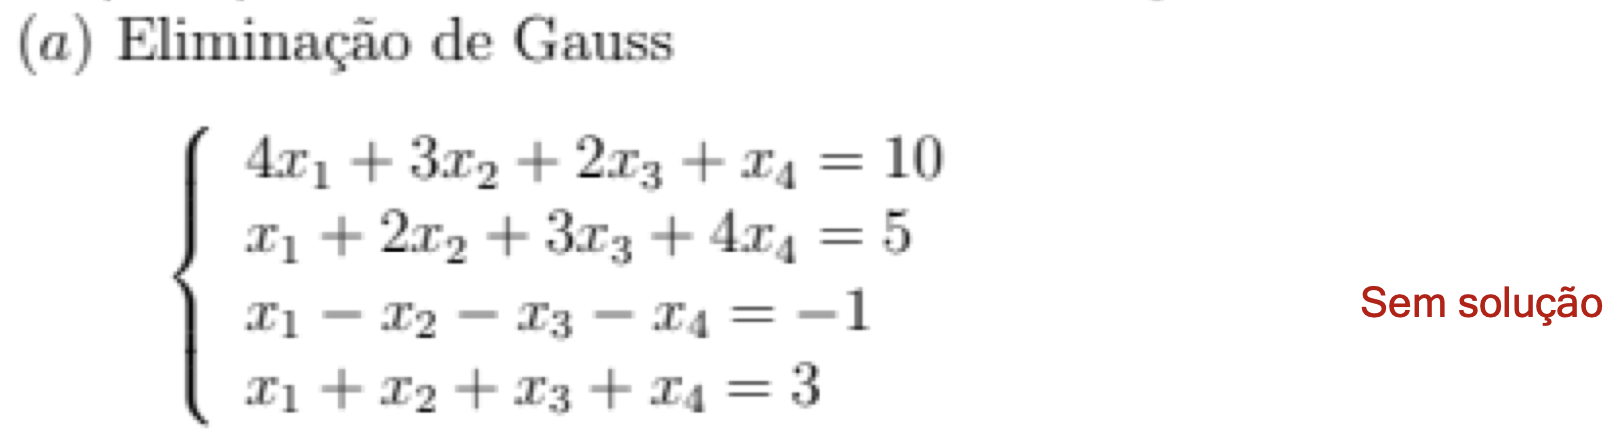

In [32]:
def montar_sistema_valores():
    n = int(input("Digite o número de variáveis (sistema quadrado): "))
    print(f"Insira os coeficientes das {n} linhas da matriz A, separados por espaço (exemplo: 1 -3 2):")
    A = []
    for i in range(n):
        linha = list(map(float, input(f"Linha {i+1}: ").split()))
        if len(linha) != n:
            raise ValueError("Número de coeficientes deve ser igual ao número de variáveis!")
        A.append(linha)
    print("Agora digite os termos independentes do vetor b, um por linha:")
    b = [float(input(f"b{i+1}: ")) for i in range(n)]
    return A, b, [f"x{i+1}" for i in range(n)]

def imprimir_matriz_b(A, b):
    n = len(A)
    print("Matriz A | Vetor b")
    for i in range(n):
        linha = ' '.join(str(A[i][j]) for j in range(n))
        print(f"[ {linha} ] | {b[i]}")
    print()

def eliminacao_gauss_pivoteamento(A, b):
    import copy
    n = len(A)
    A = copy.deepcopy(A)
    b = b[:]
    print("Sistema inicial:")
    imprimir_matriz_b(A, b)

    for k in range(n):
        pivo_linha = max(range(k, n), key=lambda i: abs(A[i][k]))
        if abs(A[pivo_linha][k]) < 1e-12:
            print("Sistema impossível (pivô zero detectado).")
            return None, None, None
        if pivo_linha != k:
            print(f"Trocando linha {k} com linha {pivo_linha} por pivoteamento")
            A[k], A[pivo_linha] = A[pivo_linha], A[k]
            b[k], b[pivo_linha] = b[pivo_linha], b[k]
            imprimir_matriz_b(A, b)

        for i in range(k + 1, n):
            fator = A[i][k] / A[k][k]
            print(f"Multiplicando linha {k} por {fator} e subtraindo da linha {i}")
            for j in range(k, n):
                A[i][j] -= fator * A[k][j]
            b[i] -= fator * b[k]
            imprimir_matriz_b(A, b)

    x = [0] * n
    for i in range(n - 1, -1, -1):
        soma = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (b[i] - soma) / A[i][i]

    return x, A, b

def calcular_residuo(A, x, b):
    n = len(A)
    residuo = []
    for i in range(n):
        soma = sum(A[i][j] * x[j] for j in range(n))
        val = soma - b[i]
        residuo.append(val)
    return residuo

def main():
    A, b, vars = montar_sistema_valores()
    solucao, A_triangular, b_modificado = eliminacao_gauss_pivoteamento(A, b)
    if solucao is None:
        print("Solução: Sistema impossível.")
        return
    print("Solução do sistema:")
    for var, val in zip(vars, solucao):
        print(f"{var} = {val}")

    residuo = calcular_residuo(A_triangular, solucao, b_modificado)
    print("\nResíduo (Ax - b):")
    for i, r in enumerate(residuo):
        print(f"r{i+1} = {r}")

if __name__ == "__main__":
    main()

Insira os coeficientes das 4 linhas da matriz A, separados por espaço (exemplo: 1 -3 2):
Agora digite os termos independentes do vetor b, um por linha:
Sistema inicial:
Matriz A | Vetor b
[ 4.0 3.0 2.0 1.0 ] | 10.0
[ 1.0 2.0 3.0 4.0 ] | 5.0
[ 1.0 -1.0 -1.0 -1.0 ] | -1.0
[ 1.0 1.0 1.0 1.0 ] | 3.0

Multiplicando linha 0 por 0.25 e subtraindo da linha 1
Matriz A | Vetor b
[ 4.0 3.0 2.0 1.0 ] | 10.0
[ 0.0 1.25 2.5 3.75 ] | 2.5
[ 1.0 -1.0 -1.0 -1.0 ] | -1.0
[ 1.0 1.0 1.0 1.0 ] | 3.0

Multiplicando linha 0 por 0.25 e subtraindo da linha 2
Matriz A | Vetor b
[ 4.0 3.0 2.0 1.0 ] | 10.0
[ 0.0 1.25 2.5 3.75 ] | 2.5
[ 0.0 -1.75 -1.5 -1.25 ] | -3.5
[ 1.0 1.0 1.0 1.0 ] | 3.0

Multiplicando linha 0 por 0.25 e subtraindo da linha 3
Matriz A | Vetor b
[ 4.0 3.0 2.0 1.0 ] | 10.0
[ 0.0 1.25 2.5 3.75 ] | 2.5
[ 0.0 -1.75 -1.5 -1.25 ] | -3.5
[ 0.0 0.25 0.5 0.75 ] | 0.5

Trocando linha 1 com linha 2 por pivoteamento
Matriz A | Vetor b
[ 4.0 3.0 2.0 1.0 ] | 10.0
[ 0.0 -1.75 -1.5 -1.25 ] | -3.5
[ 0.0 1.25 2.5

## Questão 2b: Decomposição LU
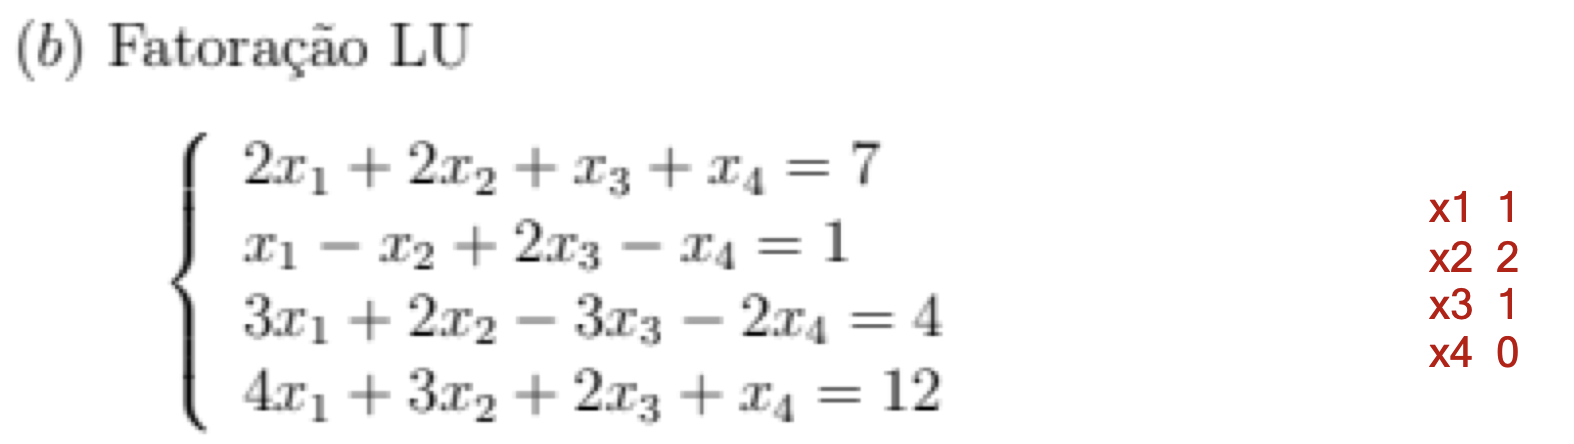

In [29]:
import numpy as np
from sympy import symbols

def montar_sistema_interativo():
    n = int(input("Digite o número de variáveis (sistema quadrado): "))
    print("Insira os coeficientes de cada equação separados por espaço (ex.: 1 -3 2):")
    A_lista = []
    for i in range(n):
        linha = list(map(float, input(f"Coeficientes da equação {i+1}: ").split()))
        if len(linha) != n:
            raise ValueError("Número de coeficientes deve ser igual ao número de variáveis.")
        A_lista.append(linha)
    print("Insira os valores do vetor b, um valor por linha:")
    b_lista = [float(input(f"b{i+1}: ")) for i in range(n)]
    variaveis = symbols(f'x1:{n+1}')
    A = np.array(A_lista)
    b = np.array(b_lista)
    return A, b, variaveis

def lu_sem_pivot(A):
    n = len(A)
    U = A.astype(float).copy()
    L = np.eye(n)
    print('\nInício da decomposição LU sem pivotação:')
    for k in range(n-1):
        print(f'Etapa {k}:')
        for i in range(k+1, n):
            m = U[i,k]/U[k,k]
            print(f"m_{{{i+1},{k+1}}} = {U[i,k]} / {U[k,k]} = {m}")
            L[i,k] = m
            U[i,:] -= m * U[k,:]
            print(f"Linha {i+1}: ({m})*L_{k+1} + L_{i+1}")
            print('U =\n', U)
            print('L =\n', L)
    return L, U

def triangular_solve(U, y):
    n = len(U)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:]))/U[i,i]
    return x

def forward_solve(L, b):
    n = len(L)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i]))/L[i,i]
    return y

def residuos(A, x, b):
    r = b - A @ x
    return r

def main():
    A, b, vars = montar_sistema_interativo()
    print('\n==== LU sem pivotação ===')
    L, U = lu_sem_pivot(A)
    y = forward_solve(L, b)
    x = triangular_solve(U, y)
    print('\nSolução (sem pivotação):')
    for v, val in zip(vars, x):
        print(f"{v} = {val}")
    print('Resíduo:', residuos(A, x, b))

if __name__ == "__main__":
    main()

Insira os coeficientes de cada equação separados por espaço (ex.: 1 -3 2):
Insira os valores do vetor b, um valor por linha:

==== LU sem pivotação ===

Início da decomposição LU sem pivotação:
Etapa 0:
m_{2,1} = 1.0 / 2.0 = 0.5
Linha 2: (0.5)*L_1 + L_2
U =
 [[ 2.   2.   1.   1. ]
 [ 0.  -2.   1.5 -1.5]
 [ 3.   2.  -3.  -2. ]
 [ 4.   3.   2.   1. ]]
L =
 [[1.  0.  0.  0. ]
 [0.5 1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
m_{3,1} = 3.0 / 2.0 = 1.5
Linha 3: (1.5)*L_1 + L_3
U =
 [[ 2.   2.   1.   1. ]
 [ 0.  -2.   1.5 -1.5]
 [ 0.  -1.  -4.5 -3.5]
 [ 4.   3.   2.   1. ]]
L =
 [[1.  0.  0.  0. ]
 [0.5 1.  0.  0. ]
 [1.5 0.  1.  0. ]
 [0.  0.  0.  1. ]]
m_{4,1} = 4.0 / 2.0 = 2.0
Linha 4: (2.0)*L_1 + L_4
U =
 [[ 2.   2.   1.   1. ]
 [ 0.  -2.   1.5 -1.5]
 [ 0.  -1.  -4.5 -3.5]
 [ 0.  -1.   0.  -1. ]]
L =
 [[1.  0.  0.  0. ]
 [0.5 1.  0.  0. ]
 [1.5 0.  1.  0. ]
 [2.  0.  0.  1. ]]
Etapa 1:
m_{3,2} = -1.0 / -2.0 = 0.5
Linha 3: (0.5)*L_2 + L_3
U =
 [[ 2.    2.    1.    1.  ]
 [ 0.   -2

## Questão 3: Decomposição LU com Pivotamento
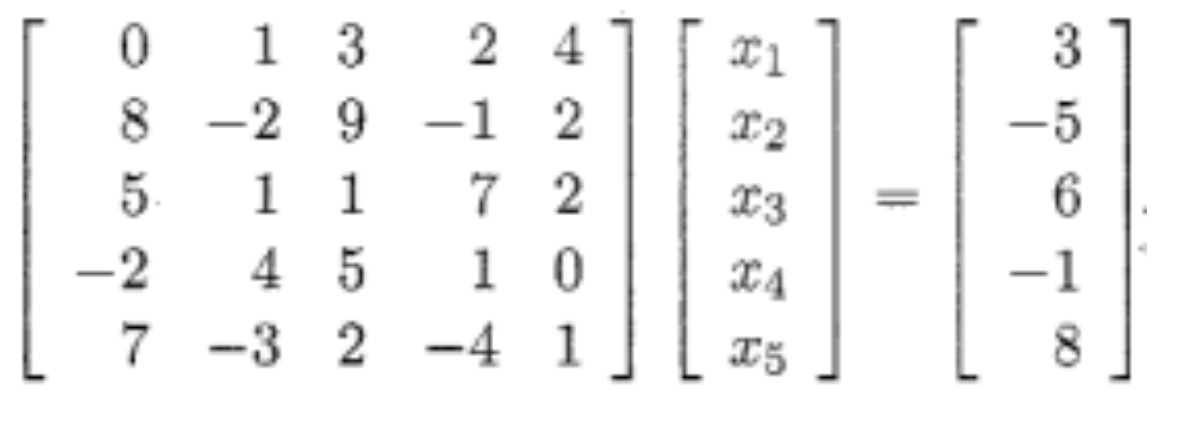

In [35]:
def montar_sistema_valores():
    n = int(input("Digite o número de variáveis (sistema quadrado): "))
    print(f"Insira os coeficientes das {n} linhas da matriz A, separados por espaço (exemplo: 1 -3 2):")
    A = []
    for i in range(n):
        linha = list(map(float, input(f"Linha {i+1}: ").split()))
        if len(linha) != n:
            raise ValueError("Número de coeficientes deve ser igual ao número de variáveis!")
        A.append(linha)
    print("Agora digite os termos independentes do vetor b, um por linha:")
    b = [float(input(f"b{i+1}: ")) for i in range(n)]
    return A, b, [f"x{i+1}" for i in range(n)]

def imprimir_matriz_b(A, b):
    n = len(A)
    print("Matriz A | Vetor b")
    for i in range(n):
        linha = ' '.join(str(A[i][j]) for j in range(n))
        print(f"[ {linha} ] | {b[i]}")
    print()

def eliminacao_gauss_pivoteamento(A, b):
    import copy
    n = len(A)
    A = copy.deepcopy(A)
    b = b[:]
    print("Sistema inicial:")
    imprimir_matriz_b(A, b)

    for k in range(n):
        # Pivoteamento parcial
        pivo_linha = max(range(k, n), key=lambda i: abs(A[i][k]))
        if abs(A[pivo_linha][k]) < 1e-12:
            raise ZeroDivisionError("Pivô zero detectado, sistema singular ou pivoteamento insuficiente.")
        if pivo_linha != k:
            print(f"Trocando linha {k} com linha {pivo_linha} por pivoteamento")
            A[k], A[pivo_linha] = A[pivo_linha], A[k]
            b[k], b[pivo_linha] = b[pivo_linha], b[k]
            imprimir_matriz_b(A, b)

        for i in range(k + 1, n):
            fator = A[i][k] / A[k][k]
            print(f"Multiplicando linha {k} por {fator} e subtraindo da linha {i}")
            for j in range(k, n):
                A[i][j] -= fator * A[k][j]
            b[i] -= fator * b[k]
            imprimir_matriz_b(A, b)

    # Retro-substituição
    x = [0] * n
    for i in range(n - 1, -1, -1):
        soma = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (b[i] - soma) / A[i][i]

    return x, A, b

def calcular_residuo(A, x, b):
    n = len(A)
    residuo = [0] * n
    for i in range(n):
        soma = sum(A[i][j] * x[j] for j in range(n))
        val = soma - b[i]
        residuo[i] = val  # Não zera valores pequenos mais
    return residuo

def main():
    A, b, vars = montar_sistema_valores()
    solucao, A_triangular, b_modificado = eliminacao_gauss_pivoteamento(A, b)
    print("\nSolução do sistema:")
    for var, val in zip(vars, solucao):
        print(f"{var} = {val}")

    residuo = calcular_residuo(A_triangular, solucao, b_modificado)
    print("\nResíduo (Ax - b):")
    for i, r in enumerate(residuo):
        print(f"r{i+1} = {r}")

if __name__ == "__main__":
    main()

Insira os coeficientes das 5 linhas da matriz A, separados por espaço (exemplo: 1 -3 2):
Agora digite os termos independentes do vetor b, um por linha:
Sistema inicial:
Matriz A | Vetor b
[ 0.0 1.0 3.0 2.0 4.0 ] | 3.0
[ 8.0 -2.0 9.0 -1.0 2.0 ] | -5.0
[ 5.0 1.0 1.0 7.0 2.0 ] | 6.0
[ -2.0 4.0 5.0 1.0 0.0 ] | -1.0
[ 7.0 -3.0 2.0 -4.0 1.0 ] | 8.0

Trocando linha 0 com linha 1 por pivoteamento
Matriz A | Vetor b
[ 8.0 -2.0 9.0 -1.0 2.0 ] | -5.0
[ 0.0 1.0 3.0 2.0 4.0 ] | 3.0
[ 5.0 1.0 1.0 7.0 2.0 ] | 6.0
[ -2.0 4.0 5.0 1.0 0.0 ] | -1.0
[ 7.0 -3.0 2.0 -4.0 1.0 ] | 8.0

Multiplicando linha 0 por 0.0 e subtraindo da linha 1
Matriz A | Vetor b
[ 8.0 -2.0 9.0 -1.0 2.0 ] | -5.0
[ 0.0 1.0 3.0 2.0 4.0 ] | 3.0
[ 5.0 1.0 1.0 7.0 2.0 ] | 6.0
[ -2.0 4.0 5.0 1.0 0.0 ] | -1.0
[ 7.0 -3.0 2.0 -4.0 1.0 ] | 8.0

Multiplicando linha 0 por 0.625 e subtraindo da linha 2
Matriz A | Vetor b
[ 8.0 -2.0 9.0 -1.0 2.0 ] | -5.0
[ 0.0 1.0 3.0 2.0 4.0 ] | 3.0
[ 0.0 2.25 -4.625 7.625 0.75 ] | 9.125
[ -2.0 4.0 5.0 1.0 0.0 